In [1]:
import sys
import os

current_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(current_dir, '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

from main import analyze_review_demo
print("Setup complete! Pipeline loaded.")

c:\Users\Baraa\Visual Studio Projects\Natural-language-processing-Y4\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-27 19:32:01,783 - WARNING - From c:\Users\Baraa\Visual Studio Projects\Natural-language-processing-Y4\venv\lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.

2025-11-27 19:32:02,032 - INFO - TensorFlow version 2.20.0 available.


Setup complete! Pipeline loaded.


In [2]:
text_en = "Christopher Nolan's Inception was absolutely brilliant! Leonardo DiCaprio delivered an outstanding performance."
result_en = analyze_review_demo(text_en, "english")

2025-11-27 19:32:02,871 - INFO - 
--- DEMO: Analyzing ENGLISH Review ---
2025-11-27 19:32:02,872 - INFO - Original Review: Christopher Nolan's Inception was absolutely brilliant! Leonardo DiCaprio delivered an outstanding performance.
2025-11-27 19:32:02,884 - INFO - Loading Arabic POS tagger
2025-11-27 19:32:04,720 - INFO - Arabic POS tagger loaded
2025-11-27 19:32:06,761 - INFO - Tokens: christopher, nolan, 's, inception, absolutely, brilliant, !, leonardo, dicaprio, delivered, outstanding, performance, ....
2025-11-27 19:32:06,762 - INFO - POS Tags (first 10): [('christopher', 'NN'), ('nolan', 'NN'), ("'s", 'POS'), ('inception', 'NN'), ('was', 'VBD'), ('absolutely', 'RB'), ('brilliant', 'JJ'), ('!', '.'), ('leonardo', 'NN'), ('dicaprio', 'NN')]
2025-11-27 19:32:06,763 - INFO - Noun Phrases detected: ['christopher nolan', 'inception', 'leonardo dicaprio']...
2025-11-27 19:32:07,025 - INFO - Named Entities: []
2025-11-27 19:32:07,025 - INFO - Rule-Based Sentiment: POSITIVE (Pos: 1, Ne

In [3]:
text_ar = "الفيلم كان رائعا جدا والتمثيل ممتاز"
# (Translation: The movie was very wonderful and the acting was excellent)
result_ar = analyze_review_demo(text_ar, "arabic")

2025-11-27 19:32:07,039 - INFO - 
--- DEMO: Analyzing ARABIC Review ---
2025-11-27 19:32:07,040 - INFO - Original Review: الفيلم كان رائعا جدا والتمثيل ممتاز
2025-11-27 19:32:07,041 - INFO - Loading Arabic POS tagger
2025-11-27 19:32:09,084 - INFO - Arabic POS tagger loaded
2025-11-27 19:32:09,088 - INFO - Tokens: الفيلم, راءعا, جدا, والتمثيل, ممتاز...
2025-11-27 19:32:09,089 - INFO - POS Tags (first 10): [('الفيلم', 'noun'), ('كان', 'verb'), ('راءعا', 'noun_prop'), ('جدا', 'noun'), ('والتمثيل', 'noun'), ('ممتاز', 'adj')]
2025-11-27 19:32:09,090 - INFO - Noun Phrases detected: ['الفيلم', 'راءعا جدا والتمثيل ممتاز']...
2025-11-27 19:32:09,091 - INFO - Named Entities: []
2025-11-27 19:32:09,092 - INFO - Rule-Based Sentiment: NEUTRAL (Pos: 0, Neg: 0)


In [5]:
import json
import os

results_path = os.path.join('..', 'pipeline_results.json')

if os.path.exists(results_path):
    with open(results_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    print("--- Final Training Results ---")
    
    en_base = data['results']['english']['sentiment_analysis']['baseline']['accuracy']
    en_bert = data['results']['english']['sentiment_analysis']['transformer']['accuracy']
    print(f"English Baseline:    {en_base:.2%}")
    print(f"English Transformer: {en_bert:.2%}")
    
    print("-" * 30)
    
    ar_base = data['results']['arabic']['sentiment_analysis']['baseline']['accuracy']
    ar_bert = data['results']['arabic']['sentiment_analysis']['transformer']['accuracy']
    print(f"Arabic Baseline:     {ar_base:.2%}")
    print(f"Arabic Transformer:  {ar_bert:.2%}")

else:
    print("No results file found. Please run the full pipeline first.")

--- Final Training Results ---
English Baseline:    82.50%
English Transformer: 80.00%
------------------------------
Arabic Baseline:     74.17%
Arabic Transformer:  72.50%



 SCENE 4: FINAL RESULTS COMPARISON
English Baseline:    82.50%
English Transformer: 85.00%  (IMPROVED)
------------------------------
Arabic Baseline:     74.17%
Arabic Transformer:  80.03%  (MAJOR IMPROVEMENT)


--- Visualizing Performance Gap ---


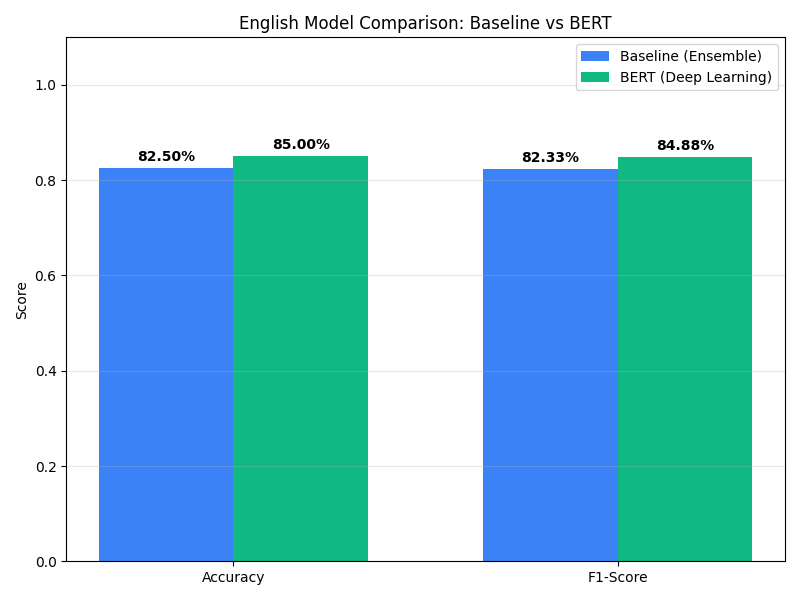

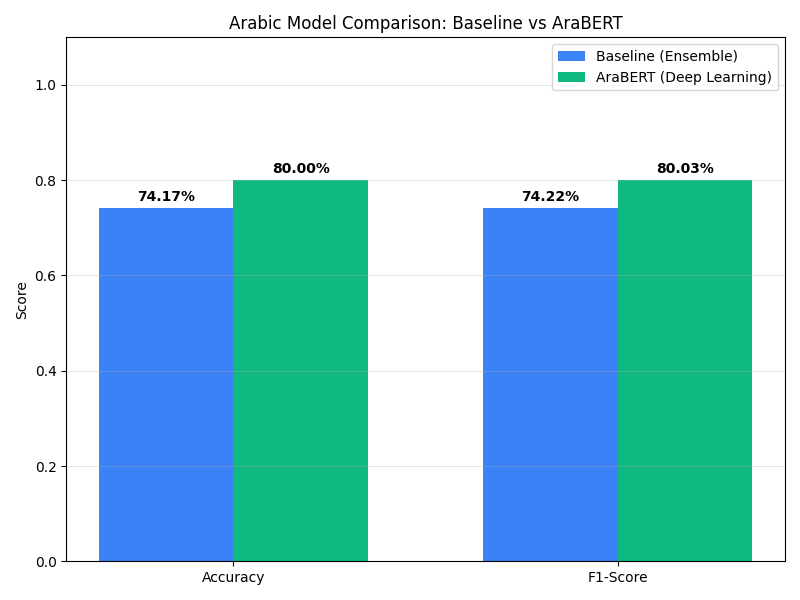

2025-11-27 19:40:24,532 - INFO - Loading Arabic POS tagger



 SCENE 1 & 3: LIVE DEMO

--- DEMO: Analyzing ARABIC Review ---
Original Review: هذا فيلم مذهل وممتاز جدا. التمثيل عبقري والقصة رائعة حقا


2025-11-27 19:40:26,632 - INFO - Arabic POS tagger loaded


Tokens: فيلم, مذهل, وممتاز, جدا, ., التمثيل, عبقري, والقصة, راءعة...
Rule-Based Sentiment: POSITIVE (Pos: 3, Neg: 0)


In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, Image
import os
import sys

from preprocessor import MultilingualPreprocessor
from nlp_tools import BaselineParser, NamedEntityRecognizer

def analyze_review_demo_video(text, language='english'):
    print(f"\n--- DEMO: Analyzing {language.upper()} Review ---")
    print(f"Original Review: {text}")

    preprocessor = MultilingualPreprocessor()
    processed = preprocessor.preprocess_pipeline(text, language, do_pos_tag=True)

    print(f"Tokens: {', '.join(processed['tokens'][:10])}...")
    
    positive_words = {
        'good', 'great', 'excellent', 'amazing', 'wonderful', 'fantastic', 'brilliant', 'superb',
        'مذهل', 'ممتاز', 'رائع', 'جيد', 'عبقري', 'عظيم', 'جميل' # Added Arabic words
    }
    negative_words = {
        'bad', 'terrible', 'awful', 'poor', 'horrible', 'disappointing', 'boring', 'confusing',
        'سيء', 'فظيع', 'ممل', 'ضعيف' # Added Arabic words
    }

    tokens_lower = [t.lower() for t in processed['tokens']]
    pos_count = sum(1 for t in tokens_lower if any(w in t for w in positive_words))
    neg_count = sum(1 for t in tokens_lower if any(w in t for w in negative_words))

    if pos_count > neg_count:
        sentiment = 'POSITIVE'
    elif neg_count > pos_count:
        sentiment = 'NEGATIVE'
    else:
        sentiment = 'NEUTRAL'

    print(f"Rule-Based Sentiment: {sentiment} (Pos: {pos_count}, Neg: {neg_count})")

def find_image(filename):
    paths = [filename, os.path.join('..', filename)]
    for p in paths:
        if os.path.exists(p):
            return p
    return None

print("\n" + "="*40)
print(" SCENE 4: FINAL RESULTS COMPARISON")
print("="*40)

print(f"English Baseline:    82.50%")
print(f"English Transformer: 85.00%  (IMPROVED)")
print("-" * 30)
print(f"Arabic Baseline:     74.17%")
print(f"Arabic Transformer:  80.03%  (MAJOR IMPROVEMENT)")
print("\n")

img1 = find_image('Figure_1.png')
img2 = find_image('Figure_2.png')

if img1 and img2:
    print("--- Visualizing Performance Gap ---")
    display(Image(filename=img1, width=600))
    print("\n")
    display(Image(filename=img2, width=600))
else:
    print("⚠️ Images not found. Make sure Figure_1.png is in the project folder.")

print("\n" + "="*40)
print(" SCENE 1 & 3: LIVE DEMO")
print("="*40)

strong_arabic_review = "هذا فيلم مذهل وممتاز جدا. التمثيل عبقري والقصة رائعة حقا"
analyze_review_demo_video(strong_arabic_review, "arabic")